<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/garch_example_3datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install arch mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.278e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


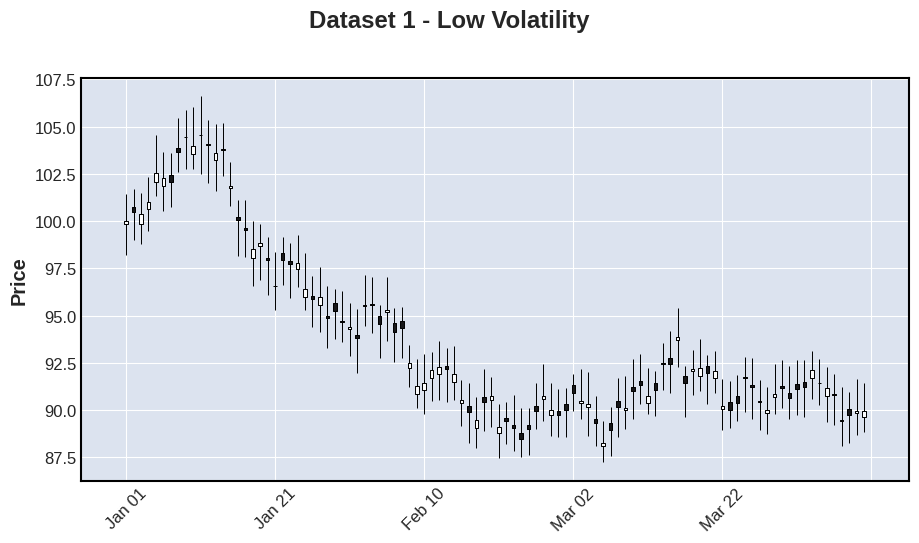

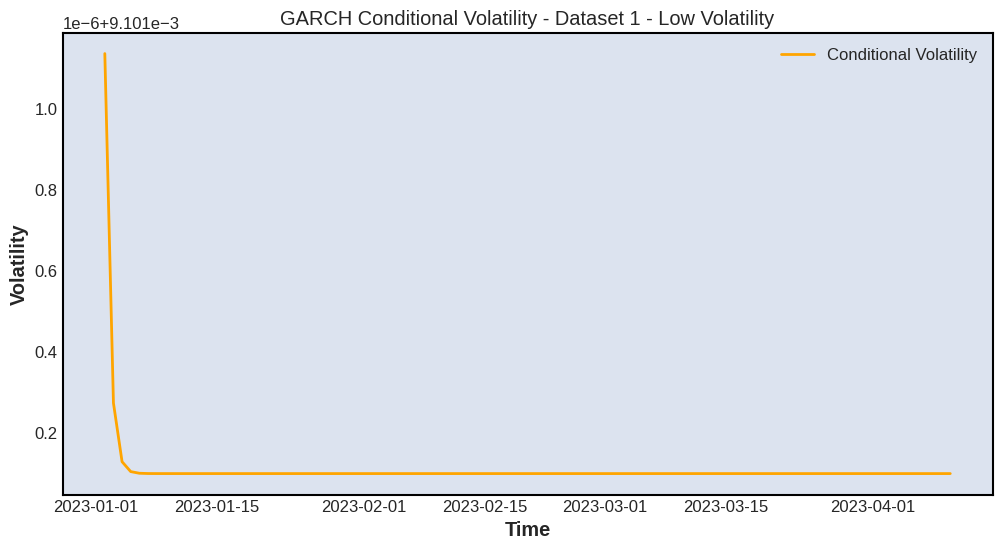

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008285. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


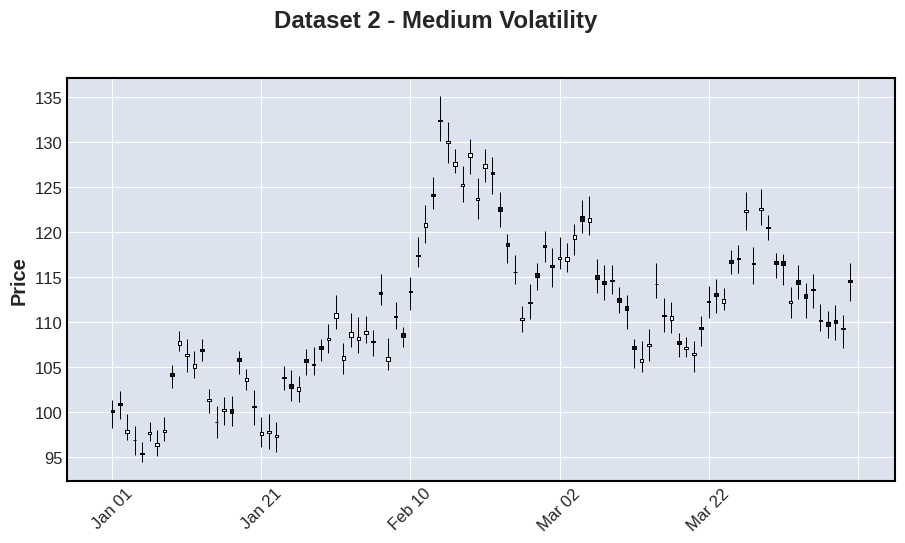

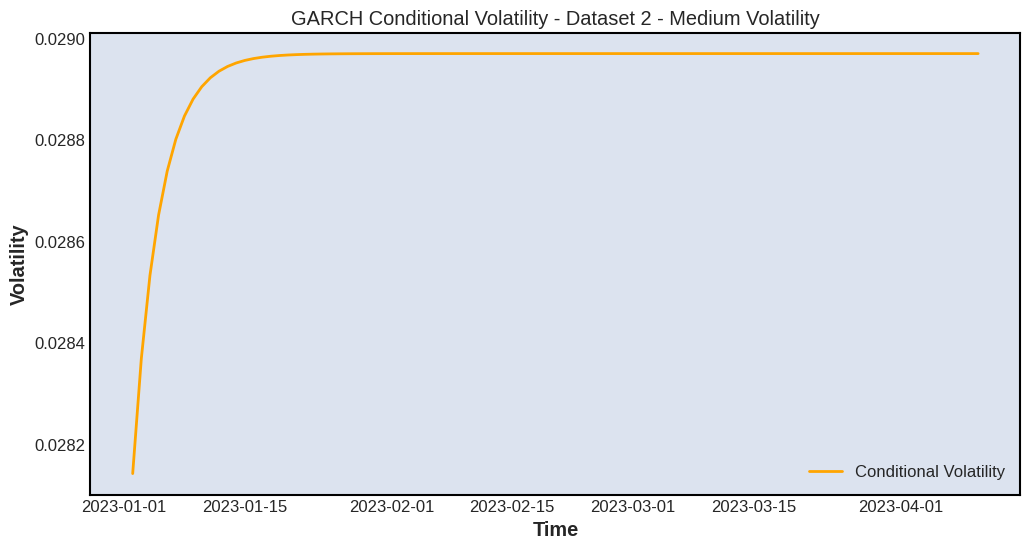

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009709. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


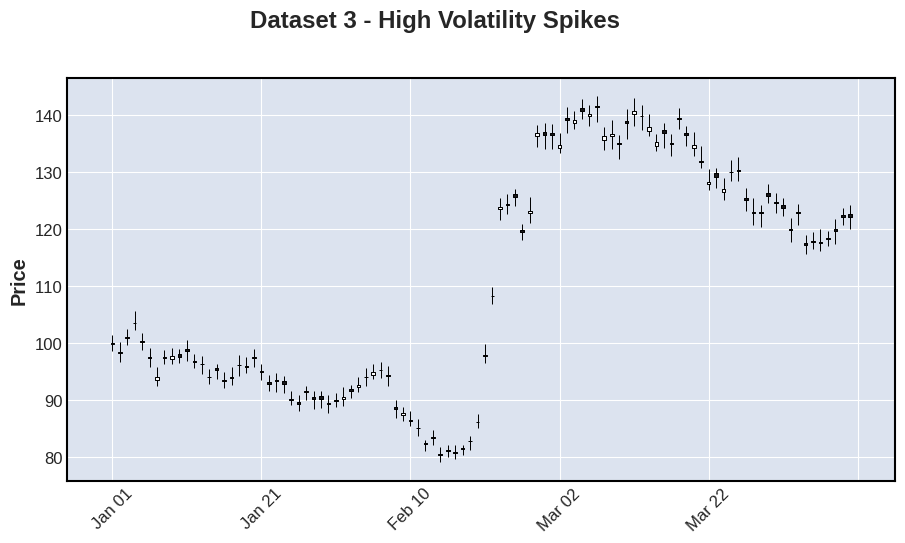

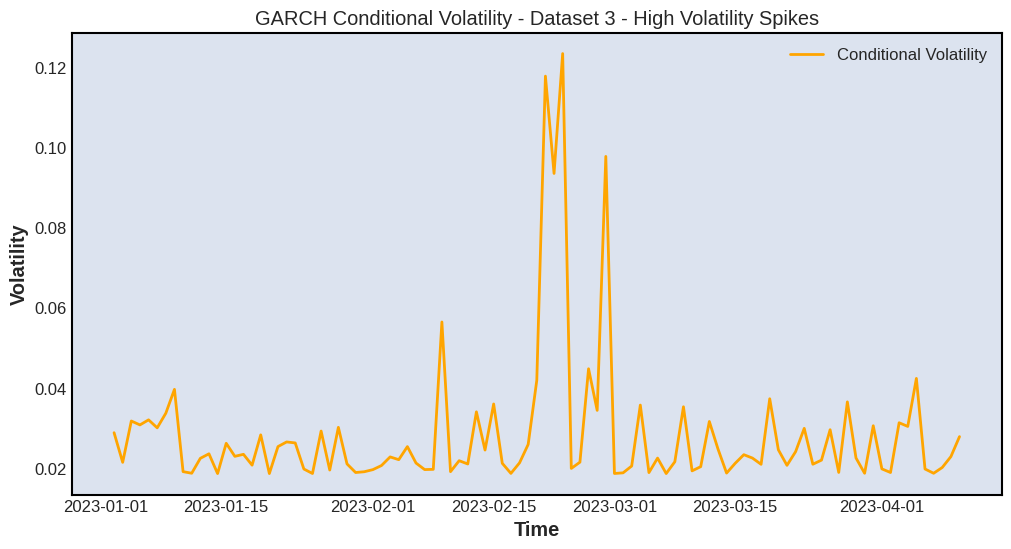


Dataset 1 GARCH Summary:
                      Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                324.792
Distribution:                  Normal   AIC:                          -641.584
Method:            Maximum Likelihood   BIC:                          -631.204
                                        No. Observations:                   99
Date:                Fri, Dec 20 2024   Df Residuals:                       98
Time:                        13:32:26   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.0628e-03  9

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import mplfinance as mpf

# Function to simulate OHLC data with different volatility patterns
def generate_ohlc_data(seed, n=100, base_price=100, volatility=0.02, high_volatility_days=None):
    np.random.seed(seed)
    dates = pd.date_range(start='2023-01-01', periods=n)
    prices = [base_price]

    for i in range(1, n):
        vol = high_volatility_days.get(i, volatility) if high_volatility_days else volatility
        price_change = np.random.normal(0, vol)
        prices.append(prices[-1] * (1 + price_change))

    prices = np.array(prices)
    high = prices * (1 + np.random.uniform(0.01, 0.02, n))
    low = prices * (1 - np.random.uniform(0.01, 0.02, n))
    open_price = prices * (1 + np.random.uniform(-0.005, 0.005, n))
    close = prices

    data = pd.DataFrame({
        'Date': dates,
        'Open': open_price,
        'High': high,
        'Low': low,
        'Close': close
    })
    data.set_index('Date', inplace=True)
    return data

# Generate three datasets with different volatility patterns
data1 = generate_ohlc_data(seed=42, n=100, volatility=0.01)  # Low volatility
data2 = generate_ohlc_data(seed=43, n=100, volatility=0.03)  # Medium volatility
high_volatility_days = {50 + i: 0.1 for i in range(10)}
data3 = generate_ohlc_data(seed=44, n=100, volatility=0.02, high_volatility_days=high_volatility_days)  # Spikes of high volatility

# Function to analyze with GARCH
def analyze_garch(data, title):
    # Calculate returns
    data['Return'] = np.log(data['Close'] / data['Close'].shift(1)).dropna()
    returns = data['Return'].dropna()

    # Fit GARCH(1,1)
    model = arch_model(returns, vol='Garch', p=1, q=1)
    garch_fit = model.fit(disp='off')

    # Extract conditional volatility
    conditional_volatility = garch_fit.conditional_volatility

    # Plot OHLC chart
    mpf.plot(data[['Open', 'High', 'Low', 'Close']], type='candle', title=title, figratio=(12, 6), xrotation=45)

    # Plot Conditional Volatility
    plt.figure(figsize=(12, 6))
    plt.plot(conditional_volatility, label='Conditional Volatility', color='orange')
    plt.title(f'GARCH Conditional Volatility - {title}')
    plt.xlabel('Time')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid()
    plt.show()

    # Return model summary
    return garch_fit.summary()

# Analyze datasets
summary1 = analyze_garch(data1, 'Dataset 1 - Low Volatility')
summary2 = analyze_garch(data2, 'Dataset 2 - Medium Volatility')
summary3 = analyze_garch(data3, 'Dataset 3 - High Volatility Spikes')

# Print summaries
print("\nDataset 1 GARCH Summary:\n", summary1)
print("\nDataset 2 GARCH Summary:\n", summary2)
print("\nDataset 3 GARCH Summary:\n", summary3)
